In [1]:
import pickle
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [2]:
def RCRPM_loading(RC,RPM,filename,endtype,densitypath):
    with open(densitypath+filename+endtype+'_readcounts.pickle', 'rb') as f:
        RC[filename]=pickle.load(f)
    with open(densitypath+filename+endtype+'_rpm.pickle', 'rb') as f:
        RPM[filename]=pickle.load(f)
    #return [rcs,rpms]

In [3]:
import multiprocessing
import pickle
import threading
from datetime import datetime

manager = multiprocessing.Manager()
RC = manager.dict()
RPM = manager.dict()

jobs = []

endtype = '_5map'
densitypath = 'density_StallReporter/'

secM_files = ['ks'+str(x) for x in range(222,226)]
EP_files = ['ks'+str(x) for x in range(230,234)]

for stall_reporter,filenames in zip(['secM','EPstop'],
                                    [secM_files,EP_files]): 
    for filename in filenames:
        ##########################################
        filename = filename+stall_reporter
        ##########################################
        job = multiprocessing.Process(target=RCRPM_loading, args=(RC,RPM,filename,endtype,densitypath))
        jobs.append(job)
        job.start()  
        
[job.join() for job in jobs] 

print('done')

done


In [4]:
def rpm_plot_plus(upstream, downstream, readcounts):
    xaxis = range(upstream, downstream+1)
    yaxis =[0 for x in range(upstream, downstream+1)]
    i = 0
    g = upstream-1
    totalread = sum(readcounts)
    while g < downstream:
        yaxis[i]=(readcounts[g]*1E6)/float(totalread)
        i+=1
        g+=1 
    return [xaxis,yaxis]

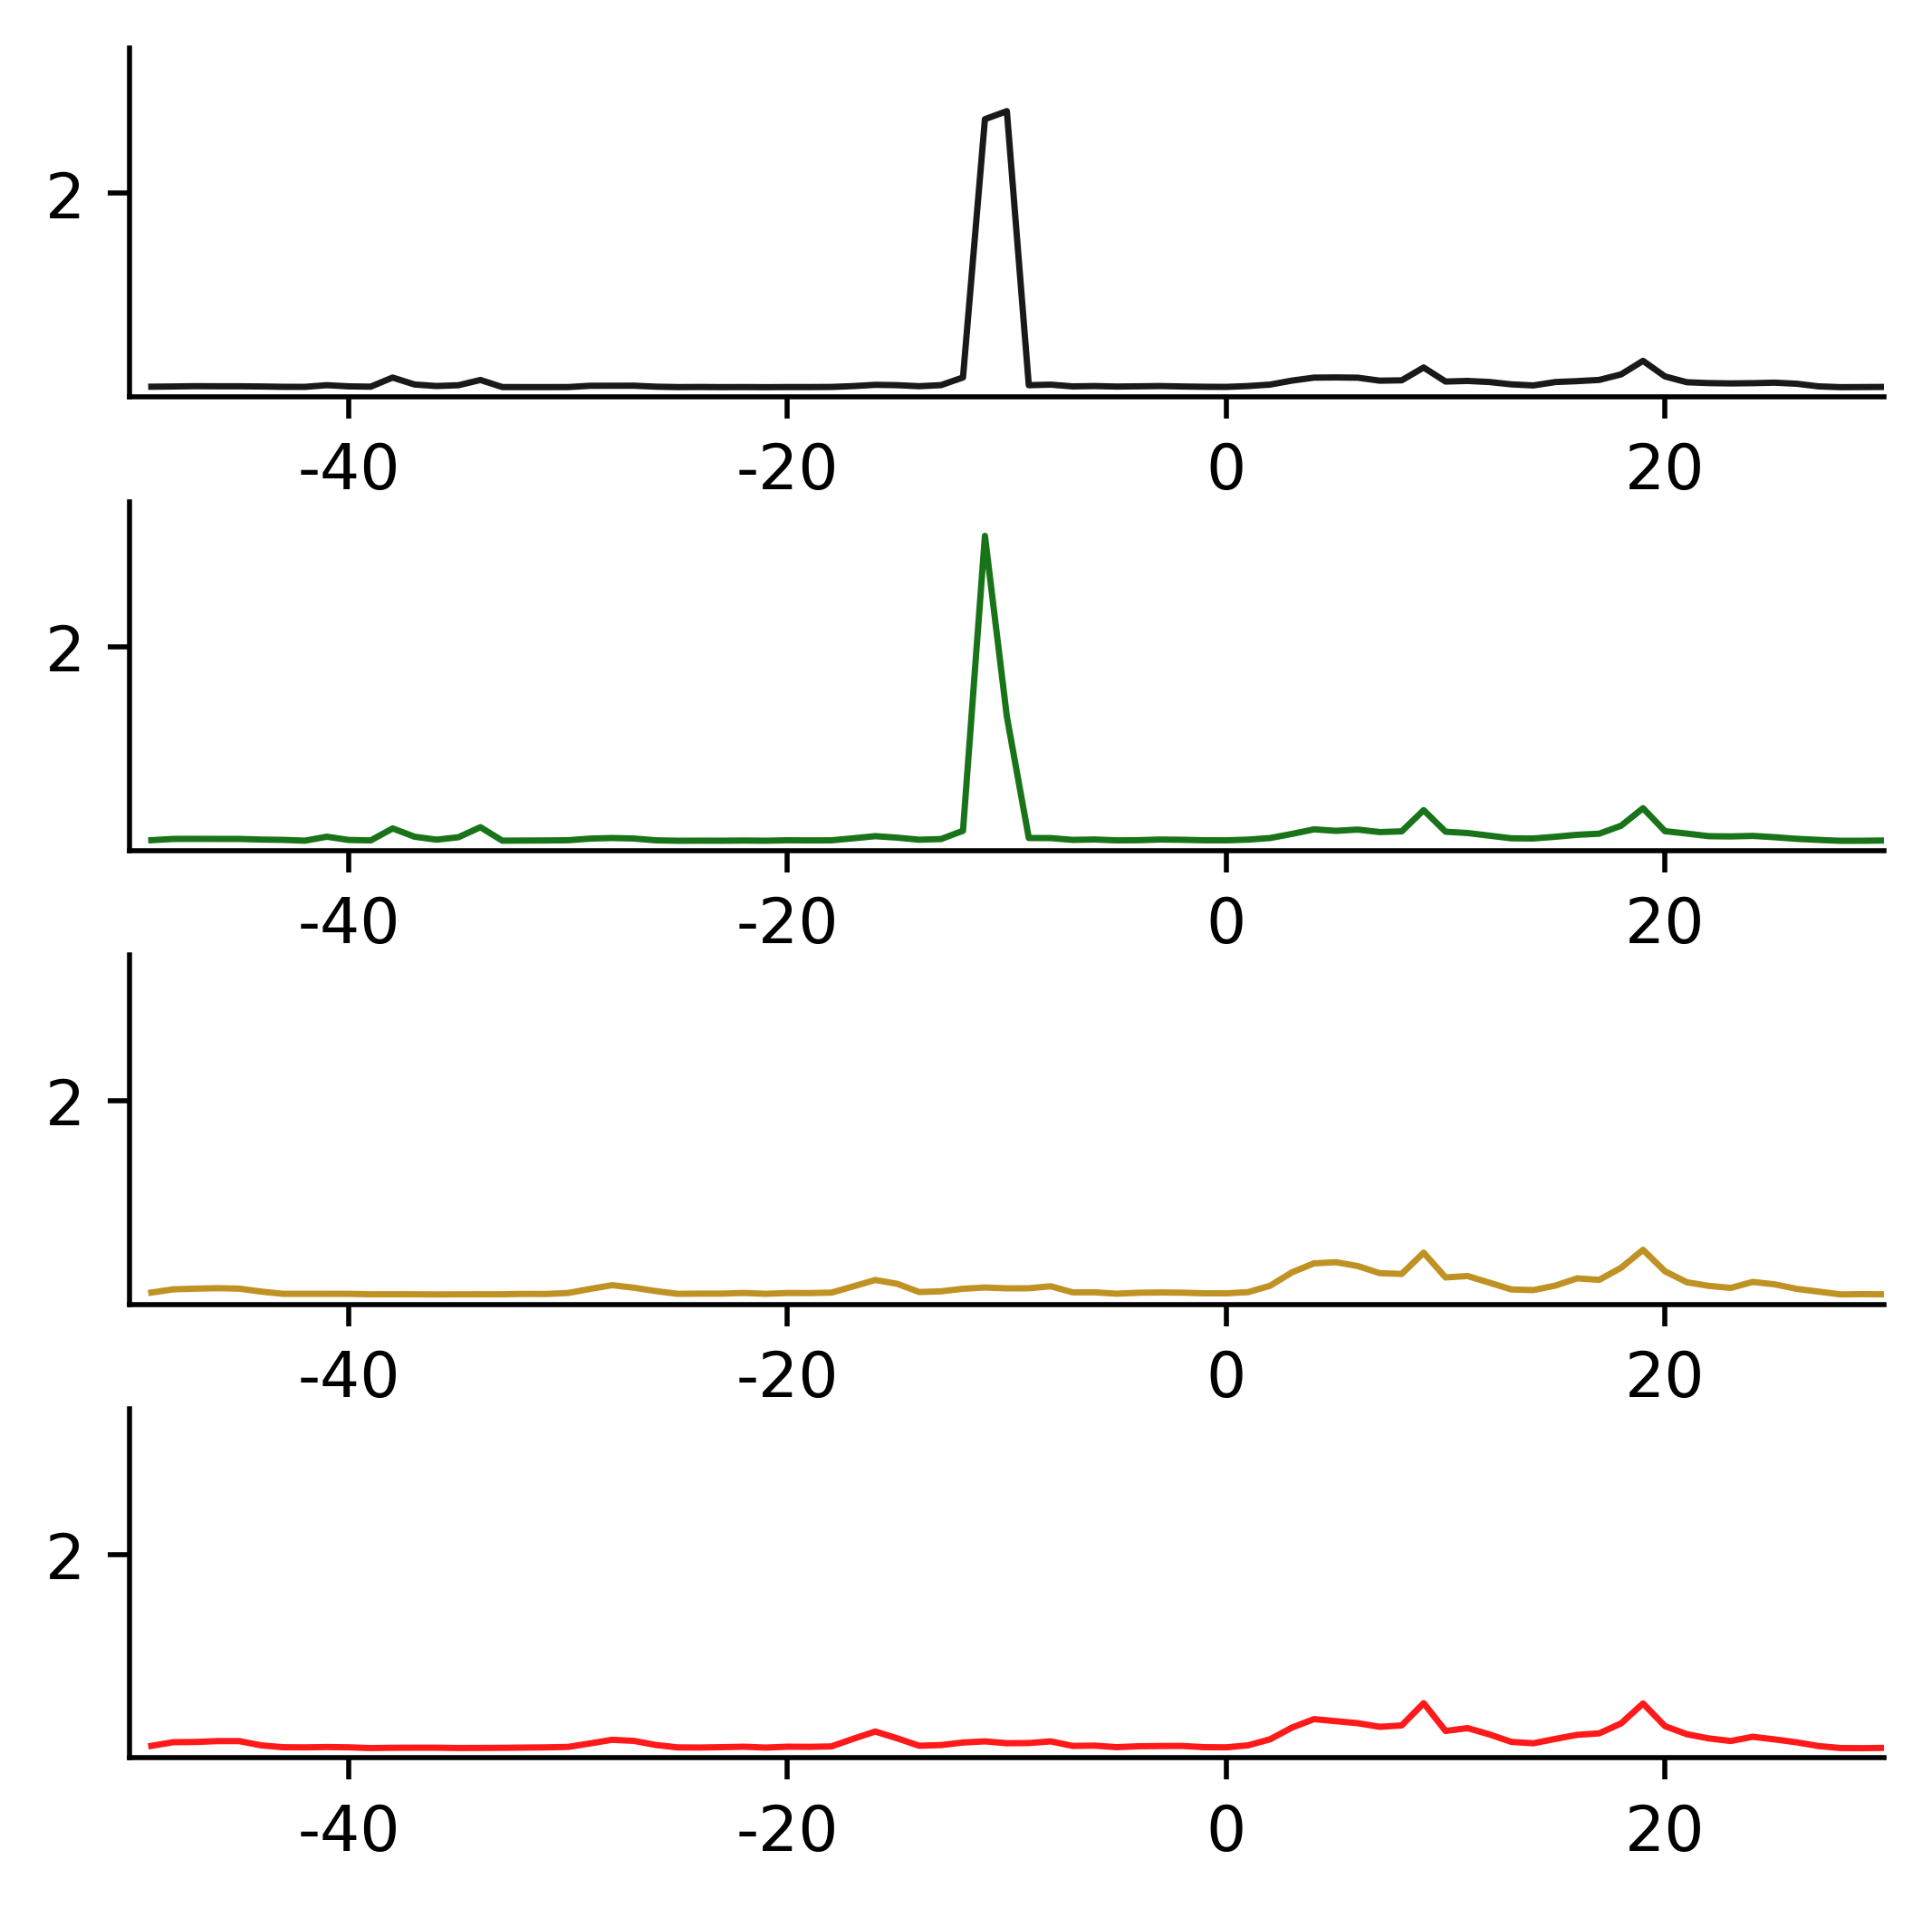

In [5]:
AUG = 0
AUG = 726
length = 1573
length = 0
up_distance = 50
down_distance = 30
upstream = AUG-up_distance
downstream = AUG+length+down_distance-1

x_data = [x for x in range (1,length+up_distance+down_distance+1)]

fig, axes = plt.subplots(4,1,sharex='row')
plt.subplots_adjust(hspace=0.3)
fig.set_dpi(500)
fig.set_size_inches(5, 5)
sns.despine()

for row_position,data,color in zip([0,1,2,3],
                                   ['ks222secM','ks223secM','ks224secM','ks225secM'],
                                   ['black','darkgreen','darkgoldenrod','red']):
    readcounts = RC[data][0]['plus']
    data=rpm_plot_plus(upstream, downstream, readcounts)
    axes[row_position].plot(x_data,data[1], linewidth = 1, color=color,alpha=0.9)
    axes[row_position].set_xticks([up_distance-40,up_distance-20,up_distance,up_distance+20])
    axes[row_position].set_xticklabels(['-40','-20','0','20'])
    axes[row_position].set_xlim(0,up_distance+length+down_distance)
    axes[row_position].set_ylim(-10000,350000)
    axes[row_position].set_yticks([200000])
    axes[row_position].set_yticklabels(['2'])

print

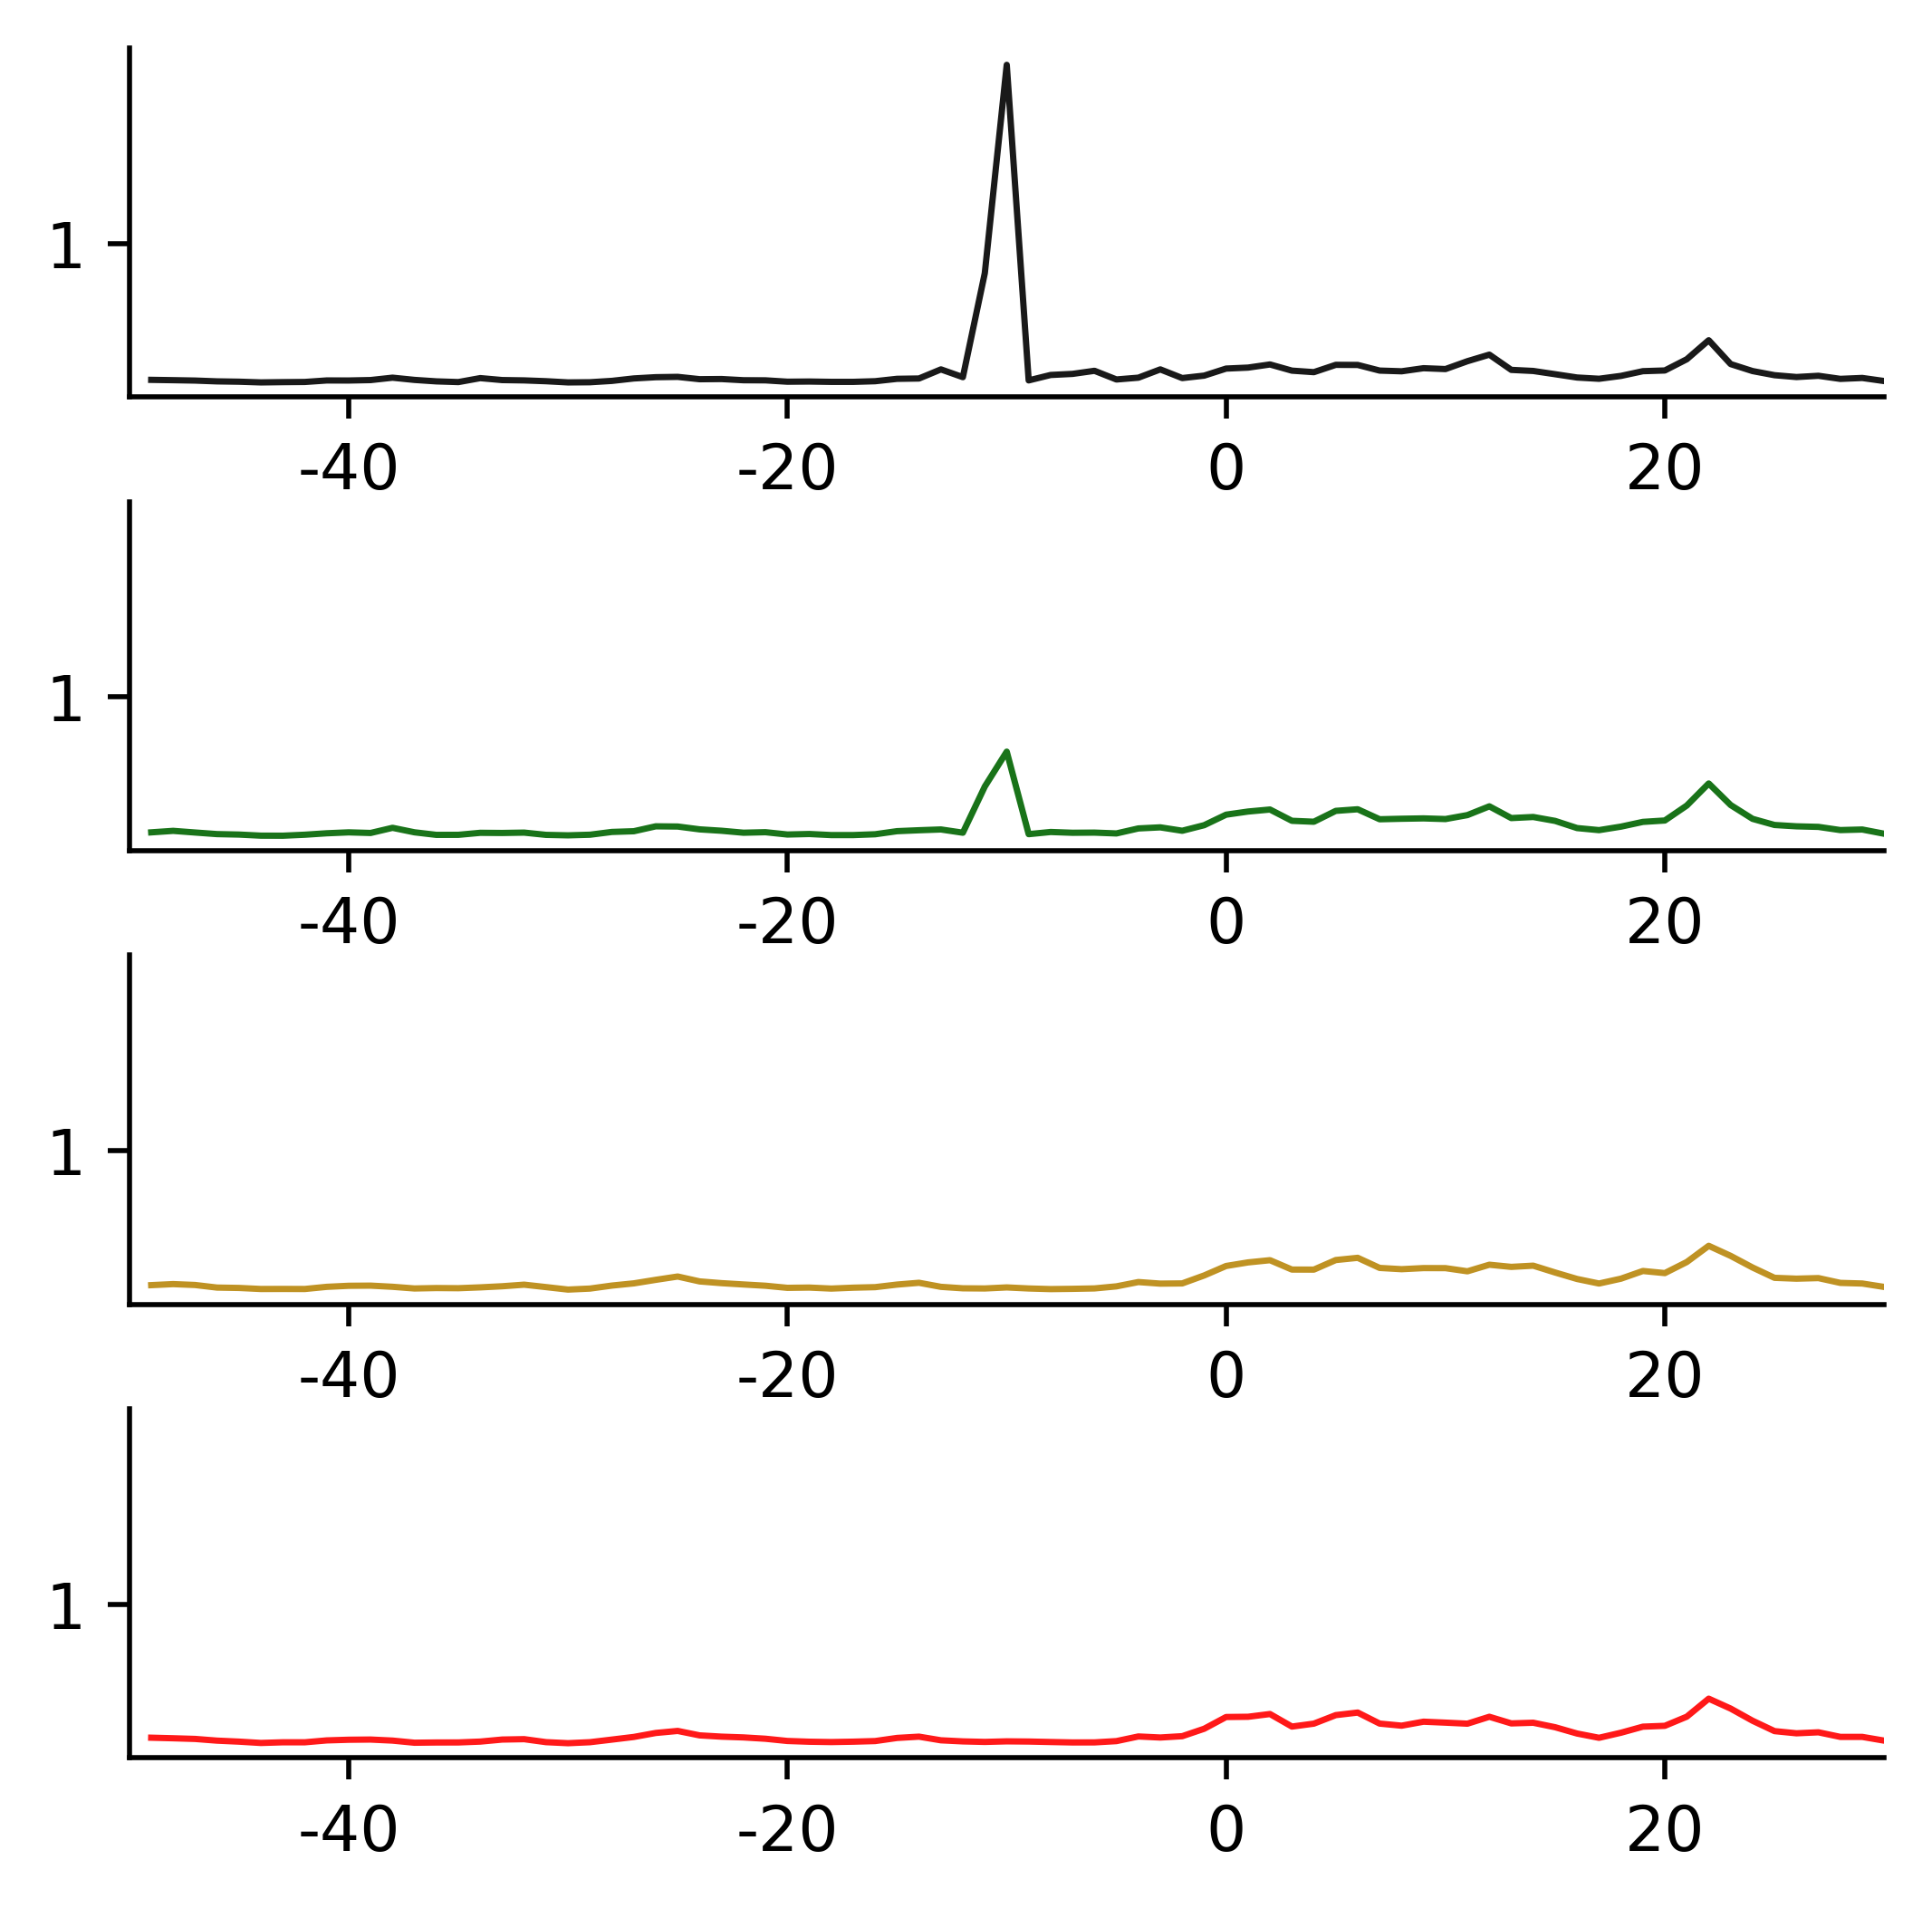

In [6]:
AUG = 0
AUG = 681
length = 1573
length = 0
up_distance = 50
down_distance = 30
upstream = AUG-up_distance
downstream = AUG+length+down_distance-1

x_data = [x for x in range (1,length+up_distance+down_distance+1)]

fig, axes = plt.subplots(4,1,sharex='row')
plt.subplots_adjust(hspace=0.3)
fig.set_dpi(500)
fig.set_size_inches(5, 5)
sns.despine()

for row_position,data,color in zip([0,1,2,3],
                                   ['ks230EPstop','ks231EPstop','ks232EPstop','ks233EPstop'],
                                   ['black','darkgreen','darkgoldenrod','red']):
    readcounts = RC[data][0]['plus']
    data=rpm_plot_plus(upstream, downstream, readcounts)
    axes[row_position].plot(x_data,data[1], linewidth = 1, color=color,alpha=0.9)
    axes[row_position].set_xticks([up_distance-40,up_distance-20,up_distance,up_distance+20])
    axes[row_position].set_xticklabels(['-40','-20','0','20'])
    axes[row_position].set_xlim(0,up_distance+length+down_distance)
    axes[row_position].set_ylim(-10000,240000)
    axes[row_position].set_yticks([100000])
    axes[row_position].set_yticklabels(['1'])

print